## 1. Install Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from bs4 import BeautifulSoup # To scrap data from Wikipedia

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 2. Scrap Bahrain Cities/Town Data from Wikipedia

In [2]:
url = 'https://en.wikipedia.org/wiki/Category:Populated_places_in_Bahrain'
html_doc = requests.get(url).text # Get HTML Doc
soup = BeautifulSoup(html_doc, 'html.parser') # Parse using bs4
blocks = soup.find_all("div", {"class": "mw-category-group"})[1:]

bh_data=[]
for block in blocks:
    places = block.find('ul').find_all('li')
    for place in places:
        bh_data.append(place.a.text.split(',')[0])

bh_data = pd.DataFrame(bh_data, columns=['Area'])
remove_places = ['Rifa and Southern Region', 'Northern City']
bh_data = bh_data[bh_data['Area'].apply(lambda item : item not in remove_places)].reset_index(drop=True)
bh_data

,Area
0,A'ali
1,Abu Baham
2,Abu Saiba
3,Al Garrya
4,Al Hajar
5,Al Kharijiya
6,Al Markh
7,Al Musalla
8,Al Qadam
9,Al Qala


In [4]:
print(f"There are about {bh_data.shape[0]} areas in Bahrain too study.")

There are about 82 areas in Bahrain too study.


## 3. Retrieve Coordinates via a Geocoder

We will leverage MapQuest and OpenStreetMap to get us the approx coordinates for each area.

In [5]:
import os
apikey = "0F8YmbPnKYoRCXi1eDHU5q2RZJZwMEXy"
import geocoder

lats = []
lngs = []
for city in bh_data['Area']:
    
    
    geocoder_type = 'osm'
    try:
        g = geocoder.osm(f"{city}, Bahrain", key=apikey)
        geodata = g.json
        lats.append(geodata['lat'])
    except:
        geocoder_type = 'MAPQUEST'
        g = geocoder.mapquest(f"{city}, Bahrain", key=apikey)
        geodata = g.json
        lats.append(geodata['lat'])
    lngs.append(geodata['lng'])
    print(city, "|", geocoder_type)
bh_data['Latitude'] = lats
bh_data['Longitude'] = lngs
bh_data.head()

A'ali | osm
Abu Baham | osm
Abu Saiba | osm
Al Garrya | osm
Al Hajar | osm
Al Kharijiya | MAPQUEST
Al Markh | osm
Al Musalla | osm
Al Qadam | osm
Al Qala | osm
Al Qurayyah | osm
Amwaj Islands | osm
Arad | osm
Askar | osm
Awali | osm
Budaiya | osm
Jid Ali | osm
Bahrain Bay | osm
Bani Jamra | MAPQUEST
Barbar | osm
Bilad Al Qadeem | osm
Bu Quwah | osm
Buri | osm
Busaiteen | osm
Al Daih | osm
Al Dair | osm
Dar Kulaib | osm
Diplomatic Area | osm
Diraz | osm
Diyar Al Muharraq | osm
Dumistan | MAPQUEST
Durrat Al Bahrain | osm
East Hidd City | osm
Eker | osm
Galali | osm
Al Hidd | osm
Halat Bu Maher | osm
Halat Nuaim | MAPQUEST
Hamad Town | osm
Hamala | osm
Hawar Islands | osm
Hillat Abdul Saleh | MAPQUEST
Isa Town | osm
Janabiyah | osm
Jannusan | osm
Jasra | osm
Jaww | osm
Jid Al-Haj | osm
Jidhafs | osm
Jurdab | MAPQUEST
Karbabad | osm
Karrana | MAPQUEST
Karzakan | osm
Khamis | osm
Ma'ameer | osm
Mahazza | MAPQUEST
Malkiya | osm
Manama | osm
Marquban | MAPQUEST
Muharraq | osm
Muqaba | MAPQUES

,Area,Latitude,Longitude
0,A'ali,26.154454,50.527364
1,Abu Baham,26.205737,50.541668
2,Abu Saiba,30.325299,48.266157
3,Al Garrya,20.639623,-100.477387
4,Al Hajar,26.225405,50.590138


Let's store them as part of the project so we don't have to re-do this step

In [4]:
# Store coordinates as CSV
bh_data.to_csv("bahrain-locations.csv", index=False)

In [7]:
# Load Coorindates Data
bh_data = pd.read_csv("bahrain-locations.csv")

## 4. Visualization on a Map

We will use **Folium** visualize the map of Bahrain along with each area as points on the map

In [8]:
# create map of Bahrain using latitude and longitude values
latitude, longitude = 25.9406805, 50.3073847

map_bahrain = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city in zip(bh_data['Latitude'], bh_data['Longitude'],
                                           bh_data['Area']):
    
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bahrain)  
    
map_bahrain

There are **inaccuracies** in the location data

## 5. Using Foursquare to Study Areas for Food Places

In [36]:
CLIENT_ID = 'E2JUP5WXPZY2VW0OPOM152ASPJG5SQVZZ5XE2UPJOOQRK2RZ' # My Foursquare ID
CLIENT_SECRET = '22IZUTH0E2YSG5W5H5Z3NKKP420THVRUS3YLZBBMNBQUKLFF' # My Foursquare Secret
ACCESS_TOKEN = '4YXG21MFRBI4KQYZ05E1N0DHLHPGTQ2HVUAQ1T1JC5OHIWSL' # My FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E2JUP5WXPZY2VW0OPOM152ASPJG5SQVZZ5XE2UPJOOQRK2RZ
CLIENT_SECRET:22IZUTH0E2YSG5W5H5Z3NKKP420THVRUS3YLZBBMNBQUKLFF


We will look at **all food places** surrouding the first area within a **500m** radius

In [16]:
print(f"The first area in our table is {bh_data.loc[0,'Area']}")

The first area in our table is A'ali


To filter only restaurants & food places, we will use the Food category ID which is `4d4b7105d754a06374d81259`

In [15]:
food_categoryId = "4d4b7105d754a06374d81259"

In [30]:
radius = 500
lat, lng = bh_data[['Latitude', 'Longitude']].iloc[0].values

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, food_categoryId, radius, LIMIT)
results = requests.get(url).json()

Looking at the first food place that was returned

In [31]:
# Inspect `results`
results['response']['venues'][0]

{'id': '4e99da8f8231878c15393aa2',
 'name': 'Costa Coffee',
 'location': {'lat': 26.157464331750106,
  'lng': 50.52587327276449,
  'labeledLatLngs': [{'label': 'display',
    'lat': 26.157464331750106,
    'lng': 50.52587327276449}],
  'distance': 366,
  'cc': 'BH',
  'city': 'Madīnat ‘Īsá',
  'state': 'al Muḩāfaz̧ah Al Janūbīyah',
  'country': 'البحرين',
  'formattedAddress': ['Madīnat ‘Īsá', 'البحرين']},
 'categories': [{'id': '4bf58dd8d48988d1e0931735',
   'name': 'Coffee Shop',
   'pluralName': 'Coffee Shops',
   'shortName': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1629295487',
 'hasPerk': False}

Next, we are going to start utilizing the Foursquare API to explore areas for food locations and segment them.

Before that, we need to find a way to **extract category** of each food place, using the first area as an example.

In [37]:
# function that extracts the category of the restaurant
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['venues']
    
nearby_food = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_food = nearby_food.loc[:, filtered_columns]

# filter the category for each row
nearby_food['categories'] = nearby_food.apply(get_category_type, axis=1)

# clean columns
nearby_food.columns = [col.split(".")[-1] for col in nearby_food.columns]

nearby_food.head()

,name,categories,lat,lng
0,Costa Coffee,Coffee Shop,26.157464,50.525873
1,Chilis Aali,Diner,26.152996,50.526268
2,Starbucks,Coffee Shop,26.158186,50.528168
3,كفتيريا المستشفى,Restaurant,26.153455,50.528375
4,Hospital Resturant (كافيتيريا المستشفى),Restaurant,26.153012,50.526232


And how many venues were returned by Foursquare?

In [38]:
print('{} food places were returned by Foursquare.'.format(nearby_food.shape[0]))

19 food places were returned by Foursquare.


## 6. Explore all areas in Bahrain for Restaurants

In [39]:
print(f"We will explore {bh_data.shape[0]} areas in Bahrain")

We will explore 82 areas in Bahrain


#### Let's create a function to get the nearest restaurants for all the areas in Bahrain


In [45]:
def getNearbyFoods(names, latitudes, longitudes, radius=500):
    food_categoryId = "4d4b7105d754a06374d81259"
    foods_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            food_categoryId,
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['venues']
        except:
            print(results)
            raise KeyError
        
        venue_list = []
        # return only relevant information for each nearby food place
        for v in results:
            vname, vlat, vlng = v['name'], v['location']['lat'], v['location']['lng']
            try:
                vcategory = v['categories'][0]['name']
                venue_list.append((name, 
                                    lat, 
                                    lng,
                                    vname, 
                                    vlat,
                                    vlng,
                                    vcategory))
            except:
                continue
        foods_list.append(venue_list)
    nearby_foods = pd.DataFrame([item for venue_list in foods_list for item in venue_list])
    nearby_foods.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_foods)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _toronto_venues_.

In [46]:
# type your answer here
bh_food = getNearbyFoods(bh_data['Area'], bh_data['Latitude'], 
                                   bh_data['Longitude'], 500)
bh_food.shape

A'ali
Abu Baham
Abu Saiba
Al Garrya
Al Hajar
Al Kharijiya
Al Markh
Al Musalla
Al Qadam
Al Qala
Al Qurayyah
Amwaj Islands
Arad
Askar
Awali
Budaiya
Jid Ali
Bahrain Bay
Bani Jamra
Barbar
Bilad Al Qadeem
Bu Quwah
Buri
Busaiteen
Al Daih
Al Dair
Dar Kulaib
Diplomatic Area
Diraz
Diyar Al Muharraq
Dumistan
Durrat Al Bahrain
East Hidd City
Eker
Galali
Al Hidd
Halat Bu Maher
Halat Nuaim
Hamad Town
Hamala
Hawar Islands
Hillat Abdul Saleh
Isa Town
Janabiyah
Jannusan
Jasra
Jaww
Jid Al-Haj
Jidhafs
Jurdab
Karbabad
Karrana
Karzakan
Khamis
Ma'ameer
Mahazza
Malkiya
Manama
Marquban
Muharraq
Muqaba
Muqsha
Nabih Saleh
Nurana Islands
Nuwaidrat
Riffa
Reef Island
Sadad
Sakhir
Salmabad
Samaheej
Sanad
Sar
Sehla
Shahrakan
Shakhura
Sitra
Sufala
Tashan
Tubli
Umm an Nasan
Zallaq


(1910, 7)

In [47]:
print(f"There are {bh_food.shape[0]} food places explored by Foursquare in Bahrain")

There are 1910 food places explored by Foursquare in Bahrain


In [48]:
# Store new as CSV
bh_food.to_csv("bahrain-foods.csv", index=False)

In [49]:
# Load Coorindates Data
bh_food = pd.read_csv("bahrain-foods.csv")

In [50]:
bh_food.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A'ali,26.154454,50.527364,Costa Coffee,26.157464,50.525873,Coffee Shop
1,A'ali,26.154454,50.527364,Chilis Aali,26.152996,50.526268,Diner
2,A'ali,26.154454,50.527364,Starbucks,26.158186,50.528168,Coffee Shop
3,A'ali,26.154454,50.527364,Hospital Resturant (كافيتيريا المستشفى),26.153012,50.526232,Restaurant
4,A'ali,26.154454,50.527364,كفتيريا المستشفى,26.153455,50.528375,Restaurant


Let's check how many were returned for each neighborhood


In [51]:
bh_food.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
A'ali,19,19,19,19,19,19
Abu Baham,9,9,9,9,9,9
Al Daih,50,50,50,50,50,50
Al Dair,9,9,9,9,9,9
Al Garrya,15,15,15,15,15,15
Al Hajar,50,50,50,50,50,50
Al Hidd,49,49,49,49,49,49
Al Kharijiya,16,16,16,16,16,16
Al Markh,29,29,29,29,29,29


#### Let's find out how many unique categories can be curated from all the returned food places

In [53]:
print('There are {} uniques types of food places.'.format(len(bh_food['Venue Category'].unique())))

There are 100 uniques types of food places.


## 7. Analyze each Area

In [54]:
# one hot encoding
bh_onehot = pd.get_dummies(bh_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bh_onehot = pd.concat([bh_food[['Area']], bh_onehot], axis=1) 

bh_onehot.head()

,Area,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bangladeshi Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Chaat Place,Chinese Restaurant,Coffee Shop,College Lab,Comfort Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Greek Restaurant,Halal Restaurant,Hookah Bar,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Lebanese Restaurant,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Movie Theater,Noodle House,Pakistani Restaurant,Pastry Shop,Persian Restaurant,Pie Shop,Pizza Place,Portuguese Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shawarma Place,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [55]:
bh_onehot.shape

(1910, 101)

#### Next, let's group rows by area and by taking the mean of the frequency of occurrence of each category, along with the number of food places surrouding it


Looking at the number of food places is significant considering that some ares have fewer restaurants, and could be a valid factor to segment with if foodie is looking at a place to stay.

In [57]:
bh_grouped = bh_onehot.groupby(['Area']).mean().reset_index()
bh_grouped['NumberOfFoodPlaces'] = bh_onehot[['Area']].value_counts(sort=False).values
bh_grouped.head()

,Area,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bangladeshi Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Chaat Place,Chinese Restaurant,Coffee Shop,College Lab,Comfort Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Gastropub,Greek Restaurant,Halal Restaurant,Hookah Bar,Hot Dog Joint,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Lebanese Restaurant,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,Movie Theater,Noodle House,Pakistani Restaurant,Pastry Shop,Persian Restaurant,Pie Shop,Pizza Place,Portuguese Restaurant,Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shawarma Place,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,NumberOfFoodPlaces
0,A'ali,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.052632,0.0,0.0,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.000000,0.210526,0.0,0.0,0.0,0.105263,0.00,0.0,0.0,0.105263,0.0,0.00,0.0,0.052632,0.0,0.000000,0.00,0.0,0.0,0.052632,0.0,0.000000,0.0,0.000000,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.052632,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.157895,0.0,0.0,0.052632,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,19
1,Abu Baham,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.111111,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.111111,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9
2,Al Daih,0.0,0.0,0.0,0.0,0.02,0.000000,0.0,0.080000,0.0,0.0,0.0,0.080000,0.0,0.0,0.020000,0.0,0.0,0.060000,0.060000,0.0,0.0,0.0,0.000000,0.02,0.0,0.0,0.000000,0.0,0.08,0.0,0.060000,0.0,0.000000,0.02,0.0,0.0,0.020000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.020000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.260000,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.060000,0.0,0.0,0.040000,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,50
3,Al Dair,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.555556,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9
4,Al Garrya,0.0,0.0,0.0,0.0,0.00,0.066667,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.133333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000

#### Let's confirm the new size


In [58]:
bh_grouped.shape

(70, 102)

#### Let's print each area along with the top 10 most common venues that sell food.


In [59]:
# Function to sort venues by most common ones
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:-1]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area', 'NumberOfFoodPlaces']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Food Place'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Food Place'.format(ind+1))

# create a new dataframe
foods_sorted = pd.DataFrame(columns=columns)
foods_sorted[['Area','NumberOfFoodPlaces']] = bh_grouped[['Area','NumberOfFoodPlaces']]

for ind in np.arange(bh_grouped.shape[0]):
    foods_sorted.iloc[ind, 2:] = return_most_common_venues(bh_grouped.iloc[ind, :], num_top_venues)

# Get the count    
foods_sorted.head()

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
0,A'ali,19,Café,Restaurant,Cupcake Shop,Coffee Shop,Middle Eastern Restaurant,Diner,Food,Falafel Restaurant,Breakfast Spot,Sandwich Place
1,Abu Baham,9,Middle Eastern Restaurant,Fish & Chips Shop,Mediterranean Restaurant,Ice Cream Shop,Restaurant,BBQ Joint,Donut Shop,Cafeteria,Pakistani Restaurant,Noodle House
2,Al Daih,50,Middle Eastern Restaurant,Dessert Shop,Bakery,Breakfast Spot,Cafeteria,Restaurant,Diner,Café,Sandwich Place,Italian Restaurant
3,Al Dair,9,Bakery,Fast Food Restaurant,Restaurant,BBQ Joint,Italian Restaurant,Afghan Restaurant,Pastry Shop,Pakistani Restaurant,Noodle House,Movie Theater
4,Al Garrya,15,Mexican Restaurant,Taco Place,Burger Joint,Restaurant,BBQ Joint,Bakery,Food Stand,Lounge,Pakistani Restaurant,Noodle House


## 8. Cluster Areas


Run _k_-means to cluster the areas into 5 clusters.


In [77]:
# set number of clusters
kclusters = 5

bh_grouped_clustering = bh_grouped.drop('Area', 1)

# scale the numerical variables : NumberOfFoodPlaces
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bh_grouped_clustering[['NumberOfFoodPlaces']] = scaler.fit_transform(bh_grouped_clustering[['NumberOfFoodPlaces']])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 4, 3, 1, 2, 3, 3, 2, 0, 2], dtype=int32)

Picking the best value of `kclusters`

In [68]:

# k_range = range(2,65)
# losses = []
# for k in k_range:

#     # run k-means clustering
#     kmeans = KMeans(n_clusters=k, random_state=0).fit(bh_grouped_clustering)
#     losses.append(kmeans.inertia_)



In [69]:
# kVSloss = list(zip(k_range, losses))

# kVSloss.sort(key=lambda x : x[1], reverse=False)
# kVSloss[0]


(64, 0.011135426990387432)

<AxesSubplot:>

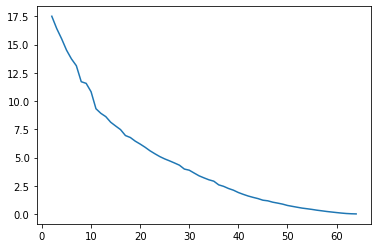

In [73]:
# import seaborn as sns
# sns.lineplot(x=k_range, y=losses)
# # plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 food places for each area.


In [78]:
# add clustering labels
try:
    foods_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    # Allows me to retry if the Cluster Labels column exists
    foods_sorted['Cluster Labels'] = kmeans.labels_

bh_merged = bh_data

# merge bh_grouped with bh_data to add latitude/longitude for each neighborhood
bh_merged = bh_merged.join(foods_sorted.set_index('Area'), on='Area')
bh_merged.dropna(how='any', axis=0, inplace=True)
bh_merged['Cluster Labels'] = bh_merged['Cluster Labels'].astype(np.int32)
bh_merged.head() # check the last columns!

,Area,Latitude,Longitude,Cluster Labels,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
0,A'ali,26.154454,50.527364,2,19.0,Café,Restaurant,Cupcake Shop,Coffee Shop,Middle Eastern Restaurant,Diner,Food,Falafel Restaurant,Breakfast Spot,Sandwich Place
1,Abu Baham,26.205737,50.541668,4,9.0,Middle Eastern Restaurant,Fish & Chips Shop,Mediterranean Restaurant,Ice Cream Shop,Restaurant,BBQ Joint,Donut Shop,Cafeteria,Pakistani Restaurant,Noodle House
3,Al Garrya,20.639623,-100.477387,2,15.0,Mexican Restaurant,Taco Place,Burger Joint,Restaurant,BBQ Joint,Bakery,Food Stand,Lounge,Pakistani Restaurant,Noodle House
4,Al Hajar,26.225405,50.590138,3,50.0,Indian Restaurant,Filipino Restaurant,Asian Restaurant,Café,Fast Food Restaurant,Restaurant,Thai Restaurant,Middle Eastern Restaurant,BBQ Joint,Bakery
5,Al Kharijiya,26.160230,50.609140,2,16.0,Fast Food Restaurant,Asian Restaurant,Cafeteria,Bakery,Wings Joint,Breakfast Spot,Falafel Restaurant,Café,Middle Eastern Restaurant,Diner


Finally, let's visualize the resulting clusters


In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bh_merged['Latitude'], bh_merged['Longitude'], bh_merged['Area'], bh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 7. Examine Clusters


Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.


#### Cluster 1


In [63]:
bh_merged.loc[bh_merged['Cluster Labels'] == 0, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
6,Al Markh,29.0,Café,Italian Restaurant,Indian Restaurant,Cafeteria,Fast Food Restaurant,Turkish Restaurant,Dessert Shop,Juice Bar,Middle Eastern Restaurant,Falafel Restaurant
22,Buri,22.0,Indian Restaurant,Bakery,Breakfast Spot,Restaurant,Food Court,Food,Café,Cafeteria,Coffee Shop,Burger Joint
39,Hamala,30.0,Coffee Shop,Café,Pizza Place,Burger Joint,Restaurant,Sandwich Place,Italian Restaurant,Mexican Restaurant,Cafeteria,Hot Dog Joint
41,Hillat Abdul Saleh,31.0,Breakfast Spot,Food Truck,Asian Restaurant,Diner,Noodle House,Dumpling Restaurant,Restaurant,Café,Food Stand,Snack Place
43,Janabiyah,30.0,Coffee Shop,Café,Pizza Place,Burger Joint,Restaurant,Sandwich Place,Italian Restaurant,Mexican Restaurant,Cafeteria,Hot Dog Joint
51,Karrana,28.0,Middle Eastern Restaurant,Restaurant,Ice Cream Shop,Asian Restaurant,Falafel Restaurant,Bakery,Coffee Shop,Burger Joint,Italian Restaurant,Fried Chicken Joint
72,Sar,27.0,Pizza Place,Burger Joint,Chinese Restaurant,Fast Food Restaurant,Breakfast Spot,Gas Station,Diner,Indian Restaurant,Thai Restaurant,Asian Restaurant
78,Tashan,25.0,Middle Eastern Restaurant,Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Café,Cafeteria,Sandwich Place,Burger Joint,Dessert Shop
81,Zallaq,28.0,Café,Coffee Shop,Restaurant,Juice Bar,Middle Eastern Restaurant,Fast Food Restaurant,Burrito Place,Cafeteria,Burger Joint,Creperie


#### Cluster 2


In [64]:
bh_merged.loc[bh_merged['Cluster Labels'] == 1, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
1,Abu Baham,9.0,Middle Eastern Restaurant,Fish & Chips Shop,Mediterranean Restaurant,Ice Cream Shop,Restaurant,BBQ Joint,Donut Shop,Cafeteria,Pakistani Restaurant,Noodle House
13,Askar,4.0,Cafeteria,Burger Joint,Café,Afghan Restaurant,Persian Restaurant,Pastry Shop,Pakistani Restaurant,Noodle House,Movie Theater,Moroccan Restaurant
14,Awali,1.0,Café,Afghan Restaurant,Mac & Cheese Joint,Pastry Shop,Pakistani Restaurant,Noodle House,Movie Theater,Moroccan Restaurant,Molecular Gastronomy Restaurant,Middle Eastern Restaurant
19,Barbar,6.0,Pizza Place,BBQ Joint,Bakery,Sandwich Place,Juice Bar,Middle Eastern Restaurant,Mac & Cheese Joint,Pastry Shop,Pakistani Restaurant,Noodle House
25,Al Dair,9.0,Bakery,Fast Food Restaurant,Restaurant,BBQ Joint,Italian Restaurant,Afghan Restaurant,Pastry Shop,Pakistani Restaurant,Noodle House,Movie Theater
26,Dar Kulaib,4.0,Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Afghan Restaurant,Mac & Cheese Joint,Pakistani Restaurant,Noodle House,Movie Theater,Moroccan Restaurant
33,Eker,6.0,Diner,Creperie,Café,Cafeteria,Middle Eastern Restaurant,Snack Place,Afghan Restaurant,Pie Shop,Pastry Shop,Pakistani Restaurant
38,Hamad Town,7.0,Sandwich Place,Wings Joint,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Bakery,Juice Bar,Mac & Cheese Joint,Pakistani Restaurant,Noodle House,Movie Theater
46,Jaww,1.0,Bakery,Afghan Restaurant,Lounge,Pastry Shop,Pakistani Restaurant,Noodle House,Movie Theater,Moroccan Restaurant,Molecular Gastronomy Restaurant,Middle Eastern Restaurant
52,Karzakan,4.0,Vegetarian / Vegan Restaurant,Turkish Restaurant,Restaurant,Shawarma Place,Afghan Restaurant,Lounge,Noodle House,Movie Theater,Moroccan Restaurant,Molecular Gastronomy Restaurant


#### Cluster 3


In [65]:
bh_merged.loc[bh_merged['Cluster Labels'] == 2, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
4,Al Hajar,50.0,Indian Restaurant,Filipino Restaurant,Asian Restaurant,Café,Fast Food Restaurant,Restaurant,Thai Restaurant,Middle Eastern Restaurant,BBQ Joint,Bakery
9,Al Qala,50.0,Café,Burger Joint,Restaurant,Bakery,Cafeteria,Breakfast Spot,Dessert Shop,Coffee Shop,Food Truck,Fast Food Restaurant
12,Arad,49.0,Middle Eastern Restaurant,Bakery,Juice Bar,Restaurant,Burger Joint,Dessert Shop,Tea Room,Ice Cream Shop,Café,Fast Food Restaurant
16,Jid Ali,49.0,Restaurant,Café,Asian Restaurant,Italian Restaurant,Coffee Shop,Fast Food Restaurant,Breakfast Spot,Diner,Dessert Shop,Seafood Restaurant
17,Bahrain Bay,49.0,Coffee Shop,Café,American Restaurant,Burger Joint,Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Dessert Shop,Movie Theater,Pizza Place
20,Bilad Al Qadeem,46.0,Café,Middle Eastern Restaurant,Ice Cream Shop,Sandwich Place,Pizza Place,Restaurant,Bakery,Breakfast Spot,Fast Food Restaurant,Burger Joint
24,Al Daih,50.0,Middle Eastern Restaurant,Dessert Shop,Bakery,Breakfast Spot,Cafeteria,Restaurant,Diner,Café,Sandwich Place,Italian Restaurant
27,Diplomatic Area,49.0,Coffee Shop,Café,Fried Chicken Joint,Burger Joint,Sushi Restaurant,Middle Eastern Restaurant,Indian Restaurant,American Restaurant,Mediterranean Restaurant,Frozen Yogurt Shop
30,Dumistan,48.0,Middle Eastern Restaurant,Café,Coffee Shop,Burger Joint,Fast Food Restaurant,Dessert Shop,Falafel Restaurant,Ice Cream Shop,American Restaurant,Arepa Restaurant
32,East Hidd City,49.0,Fried Chicken Joint,Café,Middle Eastern Restaurant,Indian Restaurant,Pizza Place,Ice Cream Shop,Chinese Restaurant,Tea Room,BBQ Joint,Restaurant


#### Cluster 4


In [66]:
bh_merged.loc[bh_merged['Cluster Labels'] == 3, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
0,A'ali,19.0,Café,Restaurant,Cupcake Shop,Coffee Shop,Middle Eastern Restaurant,Diner,Food,Falafel Restaurant,Breakfast Spot,Sandwich Place
3,Al Garrya,15.0,Mexican Restaurant,Taco Place,Burger Joint,Restaurant,BBQ Joint,Bakery,Food Stand,Lounge,Pakistani Restaurant,Noodle House
5,Al Kharijiya,16.0,Fast Food Restaurant,Asian Restaurant,Cafeteria,Bakery,Wings Joint,Breakfast Spot,Falafel Restaurant,Café,Middle Eastern Restaurant,Diner
7,Al Musalla,17.0,Fast Food Restaurant,Café,Middle Eastern Restaurant,Coffee Shop,Seafood Restaurant,Steakhouse,Food Court,Bistro,Restaurant,Japanese Restaurant
18,Bani Jamra,19.0,Breakfast Spot,Café,Cafeteria,Vegetarian / Vegan Restaurant,Restaurant,Middle Eastern Restaurant,Snack Place,Burger Joint,Fast Food Restaurant,Steakhouse
21,Bu Quwah,12.0,Turkish Restaurant,Cafeteria,Restaurant,Pizza Place,Asian Restaurant,Food,Bakery,Seafood Restaurant,Falafel Restaurant,Coffee Shop
28,Diraz,16.0,Cafeteria,Fast Food Restaurant,Middle Eastern Restaurant,Café,Snack Place,Fish & Chips Shop,Steakhouse,Breakfast Spot,Restaurant,Indian Restaurant
37,Halat Nuaim,11.0,Restaurant,Food Truck,Deli / Bodega,Coffee Shop,Seafood Restaurant,Café,Lebanese Restaurant,Burger Joint,Indian Restaurant,Bakery
44,Jannusan,11.0,Bakery,Gastropub,Snack Place,Indian Restaurant,Sandwich Place,Seafood Restaurant,Fish & Chips Shop,Cafeteria,Pakistani Restaurant,Noodle House
50,Karbabad,12.0,Café,Sandwich Place,Coffee Shop,Cafeteria,Asian Restaurant,Bakery,Middle Eastern Restaurant,Burger Joint,Afghan Restaurant,Persian Restaurant


#### Cluster 5

In [67]:
bh_merged.loc[bh_merged['Cluster Labels'] == 4, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,NumberOfFoodPlaces,1st Most Common Food Place,2nd Most Common Food Place,3rd Most Common Food Place,4th Most Common Food Place,5th Most Common Food Place,6th Most Common Food Place,7th Most Common Food Place,8th Most Common Food Place,9th Most Common Food Place,10th Most Common Food Place
11,Amwaj Islands,37.0,Café,Middle Eastern Restaurant,American Restaurant,Indian Restaurant,Restaurant,Pizza Place,Asian Restaurant,Burger Joint,Diner,Portuguese Restaurant
15,Budaiya,35.0,Middle Eastern Restaurant,Bakery,Cafeteria,Burger Joint,Seafood Restaurant,Café,Sandwich Place,Tea Room,Breakfast Spot,Fast Food Restaurant
23,Busaiteen,41.0,Coffee Shop,Café,Burger Joint,Ice Cream Shop,Tea Room,Juice Bar,Middle Eastern Restaurant,Breakfast Spot,Dessert Shop,Donut Shop
60,Muqaba,35.0,Café,Coffee Shop,Restaurant,Bakery,Breakfast Spot,Gastropub,Cafeteria,Fried Chicken Joint,Food Court,Middle Eastern Restaurant
71,Sanad,38.0,Middle Eastern Restaurant,Restaurant,Ice Cream Shop,Sandwich Place,Pizza Place,Breakfast Spot,Café,Burger Joint,Cafeteria,Bakery
79,Tubli,34.0,Restaurant,Burger Joint,Bakery,Juice Bar,Coffee Shop,Middle Eastern Restaurant,Café,Mediterranean Restaurant,Pizza Place,Diner
